<a href="https://colab.research.google.com/github/hirajya/CCMACLRL_EXERCISES_COM222/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [123]:
df = pd.read_excel('friends_info.xlsx')
df.head()

,name,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers,personality
0,justmrll_,0,1,1,468,1
1,pran.sue,0,0,1,57,0
2,ryuly_urs_,1,1,0,41,0
3,bin._.cy,1,1,1,27,1
4,dvh.n1,0,1,1,262,0


1. Display the summary of all the features of the dataset using .info()


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    55 non-null     object
 1   posts_frequently        55 non-null     int64 
 2   active_in_social_media  55 non-null     int64 
 3   replies_to_comments     55 non-null     int64 
 4   number_of_followers     55 non-null     int64 
 5   personality             55 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.7+ KB


In [125]:
df.columns

Index(['name', 'posts_frequently', 'active_in_social_media',
       'replies_to_comments', 'number_of_followers', 'personality'],
      dtype='object')

In [126]:
df.isnull().sum()

,0
name,0
posts_frequently,0
active_in_social_media,0
replies_to_comments,0
number_of_followers,0
personality,0


2. Display the total number of samples from each label using .value_counts()

In [127]:
personality_counts = df['personality'].value_counts()
print(personality_counts)


personality
1    28
0    27
Name: count, dtype: int64


In [128]:
df.shape

(55, 6)

In [129]:
for column in df.columns[1:]:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'posts_frequently':
[0 1]

Unique values in column 'active_in_social_media':
[1 0]

Unique values in column 'replies_to_comments':
[1 0]

Unique values in column 'number_of_followers':
[ 468   57   41   27  262  250  195  327  225  575 2855   91  335  196
   66  148  587  245  281  432   76  240  382 1022  374  384  228  292
  481  523  102  866  446  452  146  618  887  197  612  209  331  110
  251   73  552   40  598  214 1000 1050 1111  980  999]

Unique values in column 'personality':
[1 0]



In [130]:
# prompt: remove column named "name" from df

df_cleaned = df.drop('name', axis=1)
df_cleaned.head()

,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers,personality
0,0,1,1,468,1
1,0,0,1,57,0
2,1,1,0,41,0
3,1,1,1,27,1
4,0,1,1,262,0


# Split the dataset into training and test set

3. 3. Convert the features into an numpy array using .values() and store it in a variable "X"


In [131]:
X = df_cleaned.iloc[:, :-1]


4. Convert the labels into an numpy array using .values() and store it in a variable "y"

In [132]:
y = df_cleaned.iloc[:, -1]

print(X.shape, y.shape)


(55, 4) (55,)


In [133]:
X.head()

,posts_frequently,active_in_social_media,replies_to_comments,number_of_followers
0,0,1,1,468
1,0,0,1,57
2,1,1,0,41
3,1,1,1,27
4,0,1,1,262


In [134]:
y.head()

,personality
0,1
1,0
2,0
3,1
4,0


5. Use train_test_split() to split the data.

*   Declare a variable X_train that will
hold the training data
*  Declare a variable X_test that will hold the test data
*  Declare a variable y_train that will hold the label of the training data
*  Declare a variable y_test that will hold the label of the test data



In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 4)
(17, 4)
(38,)
(17,)


# Create the model

Accuracy for k = 1 : 0.8235294117647058
Accuracy for k = 2 : 0.7058823529411765
Accuracy for k = 3 : 0.7058823529411765
Accuracy for k = 4 : 0.7058823529411765
Accuracy for k = 5 : 0.7058823529411765
Accuracy for k = 6 : 0.7058823529411765
Accuracy for k = 7 : 0.7058823529411765
Accuracy for k = 8 : 0.5882352941176471
Accuracy for k = 9 : 0.7058823529411765
Accuracy for k = 10 : 0.5882352941176471


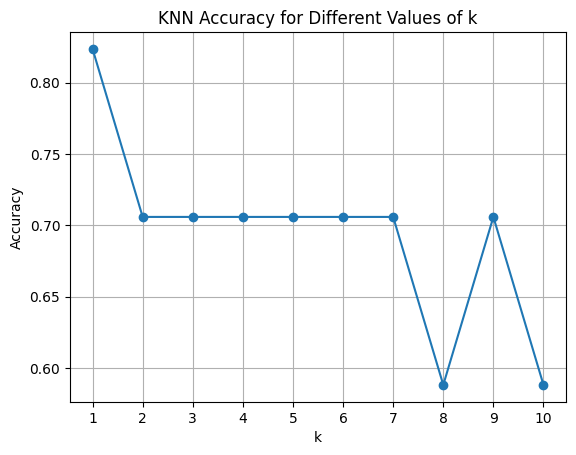

In [136]:
accuracies = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print("Accuracy for k =", i, ":", acc)

plt.plot(range(1, 11), accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

6.
Use KNN as a classifier by using KNeighborsClassifier()

In [137]:
knn = KNeighborsClassifier(n_neighbors=4)


7. Train the model using the .fit()

In [138]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

8. Test the model using the .predict()

In [139]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0])

# Evaluate the model

9. Create a confusion matrix

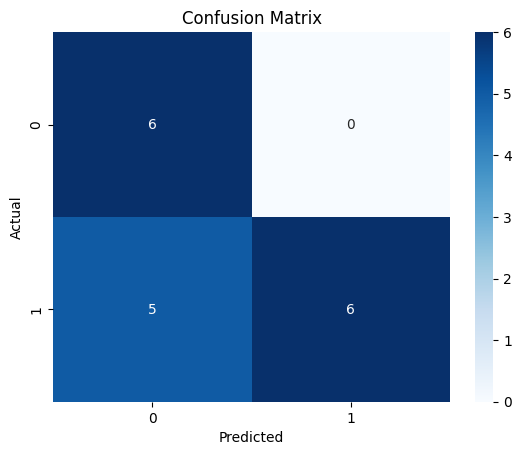

In [140]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


10. Display the accuracy

In [141]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7058823529411765


11. Display the precision

In [142]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")



Precision: 0.839572192513369


12. Display the recall

In [143]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")


Recall: 0.7058823529411765


13. Display the f1-score

In [144]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.7058823529411764


In [145]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.55      1.00      0.71         6
           1       1.00      0.55      0.71        11

    accuracy                           0.71        17
   macro avg       0.77      0.77      0.71        17
weighted avg       0.84      0.71      0.71        17



In [146]:
knn.predict([[0, 1, 0, 1000]])

array([0])